Notebook extraction `Brainsongs`
*camila*



In [5]:
#--mesure time
import time 
#soundnet in pytorch
import soundnet.extract_features as ex
import pandas as pd 
import librosa
from tqdm import tqdm
import numpy as np

In [6]:
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

# 1. The relation time - output size 

In [3]:
audiopath = "/home/brain/Desktop/BrainSongs/git/sound"
import os
listwav = []
for c in os.listdir(audiopath):
    print(c)
    if c[-3:] == 'wav':
        listwav.append(os.path.join(audiopath,c))
        
    
listwav

mattina.wav
results_nico_conv7_soundnet.tar.gz
test_nico_.wav
fingido_.wav
song_two_voices.wav
sum_.wav
dogs_.wav
sim_conv7.png
objects.txt
test_audio.wav
test_audio_.wav
railroad_audio_.wav
fingido.wav
jetedonne_.wav
test_camila_.wav
results_nico_conv7_soundnet
categories_places2.txt
ash.wav
jetedonne.wav
school_.wav
song_two_voices_.wav


['/home/brain/Desktop/BrainSongs/git/sound/mattina.wav',
 '/home/brain/Desktop/BrainSongs/git/sound/test_nico_.wav',
 '/home/brain/Desktop/BrainSongs/git/sound/fingido_.wav',
 '/home/brain/Desktop/BrainSongs/git/sound/song_two_voices.wav',
 '/home/brain/Desktop/BrainSongs/git/sound/sum_.wav',
 '/home/brain/Desktop/BrainSongs/git/sound/dogs_.wav',
 '/home/brain/Desktop/BrainSongs/git/sound/test_audio.wav',
 '/home/brain/Desktop/BrainSongs/git/sound/test_audio_.wav',
 '/home/brain/Desktop/BrainSongs/git/sound/railroad_audio_.wav',
 '/home/brain/Desktop/BrainSongs/git/sound/fingido.wav',
 '/home/brain/Desktop/BrainSongs/git/sound/jetedonne_.wav',
 '/home/brain/Desktop/BrainSongs/git/sound/test_camila_.wav',
 '/home/brain/Desktop/BrainSongs/git/sound/ash.wav',
 '/home/brain/Desktop/BrainSongs/git/sound/jetedonne.wav',
 '/home/brain/Desktop/BrainSongs/git/sound/school_.wav',
 '/home/brain/Desktop/BrainSongs/git/sound/song_two_voices_.wav']

In [3]:

output = []
for filename in listwav:
    X, _ = librosa.load(filename,sr=22050,mono=True) # Sampling rate 
    output.append(ex.extract_pytorch_feature(X,'./soundnet/sound8.pth'))


Tensor shape: torch.Size([1, 1, 29544052, 1])
Tensor shape: torch.Size([1, 1, 5019992, 1])
Tensor shape: torch.Size([1, 1, 770280, 1])
Tensor shape: torch.Size([1, 1, 213696, 1])
Tensor shape: torch.Size([1, 1, 7394688, 1])
Tensor shape: torch.Size([1, 1, 7394688, 1])
Tensor shape: torch.Size([1, 1, 439530, 1])
Tensor shape: torch.Size([1, 1, 5266944, 1])
Tensor shape: torch.Size([1, 1, 1307616, 1])
Tensor shape: torch.Size([1, 1, 5266944, 1])
Tensor shape: torch.Size([1, 1, 330750, 1])
Tensor shape: torch.Size([1, 1, 5019991, 1])


In [4]:
for a in output:
    print([x.shape for x in a])
    print("\n------")

[(1, 16, 1846503, 1), (1, 32, 115406, 1), (1, 64, 57704, 1), (1, 128, 28853, 1), (1, 256, 3606, 1), (1, 512, 1804, 1), (1, 1024, 903, 1), (1, 1000, 448, 1), (1, 401, 448, 1)]

------
[(1, 16, 313749, 1), (1, 32, 19609, 1), (1, 64, 9805, 1), (1, 128, 4903, 1), (1, 256, 613, 1), (1, 512, 307, 1), (1, 1024, 154, 1), (1, 1000, 74, 1), (1, 401, 74, 1)]

------
[(1, 16, 48142, 1), (1, 32, 3009, 1), (1, 64, 1505, 1), (1, 128, 753, 1), (1, 256, 94, 1), (1, 512, 48, 1), (1, 1024, 25, 1), (1, 1000, 9, 1), (1, 401, 9, 1)]

------
[(1, 16, 13356, 1), (1, 32, 834, 1), (1, 64, 418, 1), (1, 128, 210, 1), (1, 256, 26, 1), (1, 512, 14, 1), (1, 1024, 8, 1), (1, 1000, 1, 1), (1, 401, 1, 1)]

------
[(1, 16, 462168, 1), (1, 32, 28885, 1), (1, 64, 14443, 1), (1, 128, 7222, 1), (1, 256, 903, 1), (1, 512, 452, 1), (1, 1024, 227, 1), (1, 1000, 110, 1), (1, 401, 110, 1)]

------
[(1, 16, 462168, 1), (1, 32, 28885, 1), (1, 64, 14443, 1), (1, 128, 7222, 1), (1, 256, 903, 1), (1, 512, 452, 1), (1, 1024, 227, 1), 

In [6]:
info = []
for a in output:
    ant = a[0].shape[2]*16
    print('\n')
    vector = []
    vector.append(ant)
    for i,x in enumerate(a):
        print("Layer: {} shape: {}, ,L/H: {}, L {:.2f}".format(i,x.shape,ant/x.shape[2],ant/x.shape[2]))
        ant = x.shape[2]
        vector.append(ant)
    info.append(vector)
info = np.stack(info)
info



Layer: 0 shape: (1, 16, 1846503, 1), ,L/H: 16.0, L 16.00
Layer: 1 shape: (1, 32, 115406, 1), ,L/H: 16.000060655425195, L 16.00
Layer: 2 shape: (1, 64, 57704, 1), ,L/H: 1.9999653403576876, L 2.00
Layer: 3 shape: (1, 128, 28853, 1), ,L/H: 1.9999306831178734, L 2.00
Layer: 4 shape: (1, 256, 3606, 1), ,L/H: 8.001386577925679, L 8.00
Layer: 5 shape: (1, 512, 1804, 1), ,L/H: 1.998891352549889, L 2.00
Layer: 6 shape: (1, 1024, 903, 1), ,L/H: 1.9977851605758583, L 2.00
Layer: 7 shape: (1, 1000, 448, 1), ,L/H: 2.015625, L 2.02
Layer: 8 shape: (1, 401, 448, 1), ,L/H: 1.0, L 1.00


Layer: 0 shape: (1, 16, 313749, 1), ,L/H: 16.0, L 16.00
Layer: 1 shape: (1, 32, 19609, 1), ,L/H: 16.000254984955887, L 16.00
Layer: 2 shape: (1, 64, 9805, 1), ,L/H: 1.9998980112187659, L 2.00
Layer: 3 shape: (1, 128, 4903, 1), ,L/H: 1.9997960432388333, L 2.00
Layer: 4 shape: (1, 256, 613, 1), ,L/H: 7.99836867862969, L 8.00
Layer: 5 shape: (1, 512, 307, 1), ,L/H: 1.996742671009772, L 2.00
Layer: 6 shape: (1, 1024, 154

array([[29544048,  1846503,   115406,    57704,    28853,     3606,
            1804,      903,      448,      448],
       [ 5019984,   313749,    19609,     9805,     4903,      613,
             307,      154,       74,       74],
       [  770272,    48142,     3009,     1505,      753,       94,
              48,       25,        9,        9],
       [  213696,    13356,      834,      418,      210,       26,
              14,        8,        1,        1],
       [ 7394688,   462168,    28885,    14443,     7222,      903,
             452,      227,      110,      110],
       [ 7394688,   462168,    28885,    14443,     7222,      903,
             452,      227,      110,      110],
       [  439520,    27470,     1717,      859,      430,       54,
              28,       15,        4,        4],
       [ 5266944,   329184,    20574,    10288,     5145,      643,
             322,      162,       78,       78],
       [ 1307616,    81726,     5108,     2555,     1278,      1

In [12]:
# np.savez_compressed('./data_size_all_layer.npz',info = info)

In [13]:
info.shape

(12, 10)

conv 1 [m = 1378.13,b = -0.000000]
conv 2 [m = 86.13,b = -0.126906]
conv 3 [m = 43.07,b = 0.654664]
conv 4 [m = 21.53,b = 0.923233]
conv 5 [m = 2.69,b = 0.169046]
conv 6 [m = 1.35,b = 0.840055]
conv 7 [m = 0.67,b = 1.209309]
conv 8 [m = 0.34,b = -2.656785]
conv 9 [m = 0.34,b = -2.656785]


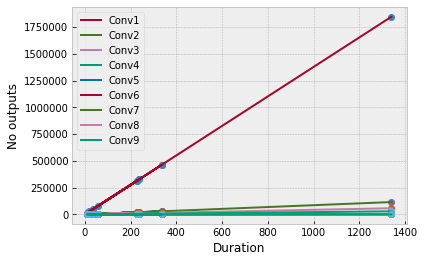

array([1339.86612245,  227.66367347,   34.93297052,    9.69142857,
        335.36      ,  335.36      ,   19.93287982,  238.86367347,
         59.30231293,  238.86367347,   15.0000907 ,  227.66367347])

In [14]:
from scipy import stats
x = info[:,0]/22050
data = []
for i in range(1,info.shape[1]):    
    y = info[:,i]
    #lineal apx
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    line = slope*x+intercept
    print("conv {:d} [m = {:.2f},b = {:2f}]".format(i,slope,intercept))
    data.append("conv{}\t{:.2f}\t{:.2f}\n".format(i,slope,intercept))
    plt.plot(x,y,'o')
    plt.plot(x, line, label="Conv{}".format(i))
    plt.xlabel('Duration')
    plt.ylabel('No outputs')
plt.legend()
plt.show()
x

In [19]:
len(data)

9

In [17]:
#os.mknod("relation_layer_seconds.txt")
header = "name_layer\tslope\tintercept\n"
with open('relation_layer_seconds.txt', 'w') as writer:
    writer.write(header)
    writer.writelines(data)

In [7]:
import numpy as np
def extract_vector(features,layer):
    # C : channel_output and H : Height
    # Vector's shape (H,C)
    C = features[layer][0].shape[0]    
    print("Cout : ",C)
    return (features[layer].reshape(C,-1).T)


In [6]:


from sklearn.metrics.pairwise import cosine_similarity,euclidean_distances
def plot_sim(vector):        
    sim_mat = cosine_similarity(vector)
    plt.figure(figsize=(10,10))
    plt.imshow(sim_mat)
    plt.colorbar()
    

Cout :  16


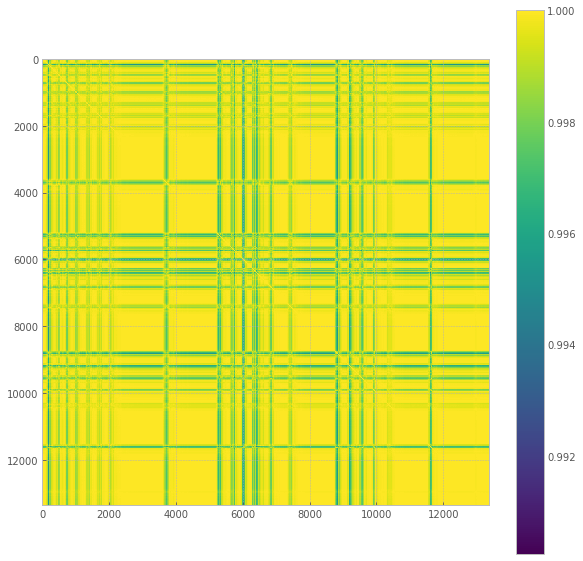

In [188]:
plot_sim(extract_vector(output[0],0))

Cout :  256


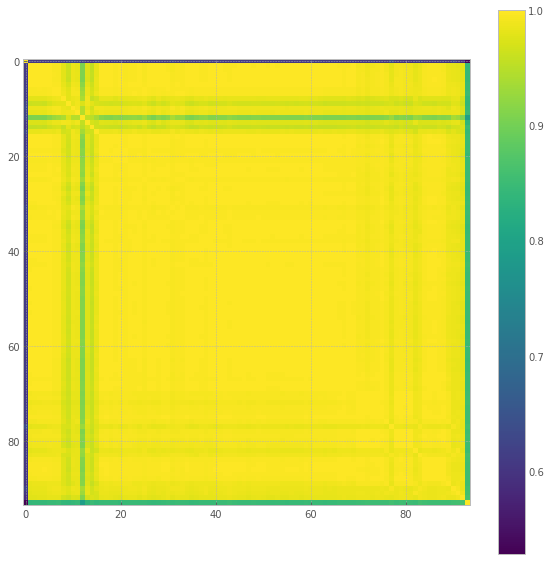

In [163]:
plot_sim(extract_vector(output[1],4))

Cout :  256


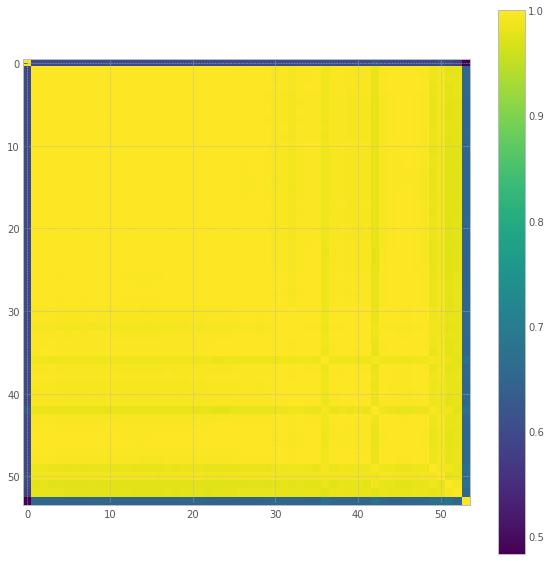

In [164]:
plot_sim(extract_vector(output[2],4))

Cout :  256


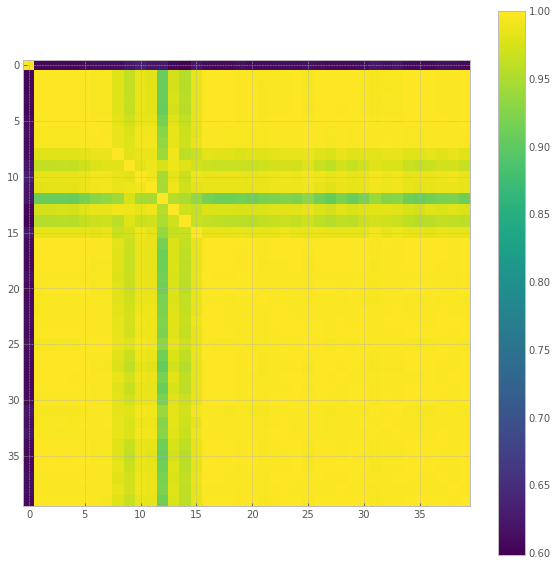

In [165]:
plot_sim(extract_vector(output[3],4))

---

# 2. How to extract feature vectors

In [2]:

def extract_vectors(filepath):
    audio,sr = ex.load_audio(filepath)
    features = ex.extract_pytorch_feature(audio,'./soundnet/sound8.pth')
   
    print([x.shape for x in features])
    
    ##extract vector
    vectors = []
    for idlayer in range(len(features)):
        vectors.append(ex.extract_vector(features,idlayer)) #features vector 
    return vectors, len(audio)/sr

In [3]:
#FUNCTION to align all features vectors

def quantize_test(vector,idlayer, res, size):
    to_layer = {}
    for i in range(9):
        to_layer[i] = "conv{}".format(i+1)

    lim = int(size/res)
    m,b = ex.get_values()[to_layer[idlayer]] #get slope (m) and interception (b) for a given layer
    vectimes = (np.array(range(0,len(vector))))/m
    maxtime = (len(vector))*(1/m)
    alltimes = np.arange(0,maxtime,res)
    qvec = []
    for i,curtime in enumerate(alltimes[:-1]):
        ind = np.argwhere((vectimes>=curtime) & (vectimes<alltimes[i+1]))
        qvec.append(np.median(vector[ind],axis = 0).reshape(-1))
    
    data = (np.stack(qvec))
    #meme taille
    dif = lim - len(data)
    if dif < 0:
        data = data[:lim]
    elif dif > 0:
        x = np.tile(data[-1],(dif,1))
        data = np.concatenate([data,x])        
    return data
    


In [135]:
filepath = '/home/brain/Desktop/BrainSongs/fmri_video/stimulus/sherlockaudio_22k.wav'
vector,size = extract_vectors(filepath)

time:  0.13059759140014648
Tensor shape: torch.Size([1, 1, 31304704, 1])
[(1, 16, 1956544, 1), (1, 32, 122284, 1), (1, 64, 61143, 1), (1, 128, 30572, 1), (1, 256, 3821, 1), (1, 512, 1911, 1), (1, 1024, 956, 1), (1, 1000, 475, 1), (1, 401, 475, 1)]
Cout :  16
Cout :  32
Cout :  64
Cout :  128
Cout :  256
Cout :  512
Cout :  1024
Cout :  1000
Cout :  401


In [205]:
#conv1 to con7è 
allfeatures = []
for i in range(7):
    feature = quantize_test(vector[i],i,1.5,size)
    print(feature.shape)
    np.savez_compressed('./sherlock_pytorch/conv{}.npz'.format(i+1),fv = feature)
    

(946, 16)
(946, 32)
(946, 64)
(946, 128)
(946, 256)
(946, 512)
(946, 1024)


## merlin

In [7]:
#filepath to audio 22kHz
filepath = '/home/brain/Desktop/BrainSongs/fmri_video/stimulus/merlinaudio_22k.wav'
vector,size = extract_vectors(filepath) #get all fv

time:  0.07902669906616211
Tensor shape: torch.Size([1, 1, 33346030, 1])
[(1, 16, 2084127, 1), (1, 32, 130258, 1), (1, 64, 65130, 1), (1, 128, 32566, 1), (1, 256, 4071, 1), (1, 512, 2036, 1), (1, 1024, 1019, 1), (1, 1000, 506, 1), (1, 401, 506, 1)]
Cout :  16
Cout :  32
Cout :  64
Cout :  128
Cout :  256
Cout :  512
Cout :  1024
Cout :  1000
Cout :  401


In [10]:
#
allfeatures = []
for i in range(7):
    resolution =  1.5 
    feature = quantize_test(vector[i],i,resolution,size)
    print(feature.shape)
    np.savez_compressed('/home/brain/Desktop/BrainSongs/fmri_video/features/soundnet_fv_pytorch_2019/merlin_pytorch/conv{}.npz'.format(i+1),fv = feature)
    

(1008, 16)
(1008, 32)
(1008, 64)
(1008, 128)
(1008, 256)
(1008, 512)
(1008, 1024)
